<a href="https://colab.research.google.com/github/ut2019nn/ut2019nn.github.io/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/NN Labs/NN Project

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/NN Labs/NN Project


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import seaborn as sns

plt.style.use('seaborn')

In [0]:
#read market
market_train_df = pd.read_csv('data/market_train_uni1_v1.csv')
market_train_df.head()

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,close_open_diff,volume_money_mean,binary_returnsNextMktres10,cluster_open_close,cluster_volume,cluster_prev_returns
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.000622,8.389004e+07,True,6,0,0
1,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,0.987365,4.397120e+07,True,6,0,0
2,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,0.982721,2.030040e+09,False,8,3,0
3,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.000555,2.177293e+07,False,1,0,0
4,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,1657300.0,52.37,52.40,-0.000191,0.008468,NaN,NaN,0.089000,0.077746,NaN,NaN,0.058680,0.999427,8.681766e+07,True,3,0,0


In [0]:
#read news
news_train_df = pd.read_csv('data/news_market_train_uni1_v1.csv')
news_train_df.head()

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,bodySize,companyCount,headlineTag,marketCommentary,sentenceCount,wordCount,assetCodes,assetName,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'ENR', 'ASIA', 'CN', 'NGS', 'EMRG', 'RTRS', '...","{'Z', 'O', 'OIL'}",1438,1,NaN,False,11,275,"{'0857.HK', '0857.F', '0857.DE', 'PTR.N'}",PetroChina Co Ltd,6,0.235702,-1,0.500739,0.419327,0.079934,73,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35+00:00,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'FEA', 'CA', 'LATAM', 'MX', 'INS', 'ASIA', 'I...","{'PGE', 'PCO', 'G', 'ESN', 'MD', 'PCU', 'DNP',...",4413,1,FEATURE,False,55,907,{'STA.N'},Travelers Companies Inc,8,0.447214,-1,0.600082,0.345853,0.054064,62,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",1776,6,PRESS DIGEST,False,14,325,{'XMSR.O'},XM Satellite Radio Holdings Inc,11,0.149071,-1,0.699274,0.209360,0.091367,102,0,0,0,0,0,0,0,0,0,0
3,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",1776,6,PRESS DIGEST,False,14,325,"{'DIS.DE', 'DIS.F', 'DIS.N'}",Walt Disney Co,5,0.149071,0,0.152658,0.615878,0.231464,46,0,0,0,0,0,0,0,2,8,8
4,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",1776,6,PRESS DIGEST,False,14,325,"{'MSFT.O', 'MSFT.F', 'MSFT.DE', 'MSFT.OQ'}",Microsoft Corp,10,0.447214,0,0.325929,0.374173,0.299898,130,0,0,0,0,0,0,0,0,4,16


In [0]:
#convert time to datetime format
market_train_df['time'] = pd.to_datetime(market_train_df['time'], format = '%Y-%m-%d %H:%M').apply(lambda x: x.date())
news_train_df['time'] = pd.to_datetime(news_train_df['time'], format = '%Y-%m-%d %H:%M').apply(lambda x: x.date())

#group news_train_df by time and assetName, then compute mean
news_train_grouped = news_train_df.groupby(['time','assetName'], sort=False).aggregate(np.mean).reset_index()
    
#merge 2 dataframes
df = pd.merge(left=market_train_df, right=news_train_grouped, how='left', on=['time', 'assetName'], copy=False)

#replace nan with 0
df.fillna(0, inplace=True)

df.head()

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,close_open_diff,volume_money_mean,binary_returnsNextMktres10,cluster_open_close,cluster_volume,cluster_prev_returns,urgency,takeSequence,bodySize,companyCount,marketCommentary,sentenceCount,wordCount,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-02-01,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,0.0,0.0,-0.001860,0.000622,0.0,0.0,0.034672,1.000622,8.389004e+07,True,6,0,0,3.0,1.0,5483.0,6.5,0.0,33.0,893.0,9.0,0.533333,0.5,0.080418,0.568264,0.351318,418.5,0.0,0.0,0.0,0.0,0.0,1.0,1.5,4.5,6.0,7.0
1,2007-02-01,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,0.0,0.0,0.014332,0.045405,0.0,0.0,0.024433,0.987365,4.397120e+07,True,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-02-01,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,0.0,0.0,-0.048613,-0.037182,0.0,0.0,-0.007425,0.982721,2.030040e+09,False,8,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-02-01,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,0.0,0.0,0.012929,0.020397,0.0,0.0,-0.017994,1.000555,2.177293e+07,False,1,0,0,3.0,1.0,821.0,2.0,0.0,7.0,112.0,6.0,0.447214,0.0,0.016462,0.861472,0.122067,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0
4,2007-02-01,ABC.N,AmerisourceBergen Corp,1657300.0,52.37,52.40,-0.000191,0.008468,0.0,0.0,0.089000,0.077746,0.0,0.0,0.058680,0.999427,8.681766e+07,True,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#subdata = apple_df[['assetName', 'assetCode']]
    
#group by assetName
#group_df = subdata.groupby('assetName')['assetCode'].apply(set).reset_index()



#apple inc data only
apple_df = df[df['assetName'] == 'Apple Inc']
apple_df = apple_df[[ 'time','open', 'close', 'close_open_diff', 'volume', 'urgency', 'relevance','sentimentClass', 'sentimentNegative', 'sentimentNeutral', 'sentimentPositive','noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts3D', 'volumeCounts5D', 'volumeCounts7D', 'returnsOpenPrevMktres1', 'returnsOpenPrevRaw1', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw10', 'returnsOpenPrevMktres10','returnsOpenNextMktres10']]

#save process data to csv
apple_df.to_csv('data/apple_data.csv')


apple_df.tail(10)

,time,open,close,close_open_diff,volume,urgency,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts3D,volumeCounts5D,volumeCounts7D,returnsOpenPrevMktres1,returnsOpenPrevRaw1,returnsClosePrevRaw1,returnsOpenPrevRaw10,returnsOpenPrevMktres10,returnsOpenNextMktres10
2412629,2016-12-16,116.47,115.97,0.995707,44351134.0,2.846154,0.691166,-0.076923,0.389906,0.281369,0.328724,0.461538,0.461538,0.461538,45.538462,64.692308,66.307692,0.002764,0.009447,0.001295,0.066868,0.052990,-0.000892
2413693,2016-12-19,115.80,116.64,1.007254,27779423.0,2.538462,0.774005,-0.230769,0.448571,0.201090,0.350339,0.230769,0.692308,0.769231,19.384615,53.692308,74.769231,-0.001459,-0.005753,0.005777,0.052727,0.035702,-0.007985
2414752,2016-12-20,116.74,116.95,1.001799,21424965.0,1.900000,0.676660,-0.300000,0.404440,0.272701,0.322860,0.300000,0.350000,0.450000,23.500000,43.400000,76.050000,0.003843,0.008117,0.002658,0.066119,0.036367,-0.000514
2415812,2016-12-21,116.80,117.06,1.002226,23783165.0,2.222222,0.737890,-0.444444,0.525105,0.266927,0.207967,1.055556,1.166667,1.222222,41.611111,46.333333,77.000000,-0.001886,0.000514,0.000941,0.069010,0.020918,0.008045
2416871,2016-12-22,116.35,116.29,0.999484,26085854.0,2.789474,0.612710,-0.631579,0.607156,0.195297,0.197547,1.789474,2.105263,2.157895,49.631579,61.000000,86.000000,0.000322,-0.003853,-0.006578,0.049522,0.031921,0.022225
2417926,2016-12-23,115.59,116.52,1.008046,14249484.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005048,-0.006532,0.001978,0.029205,0.020541,0.017686
2418978,2016-12-27,116.52,117.26,1.006351,18296855.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004588,0.008046,0.006351,0.028511,0.023127,0.011142
2420020,2016-12-28,117.52,116.76,0.993533,20905892.0,2.250000,0.554593,-0.250000,0.380597,0.364883,0.254521,0.375000,0.375000,0.375000,3.500000,3.500000,37.750000,0.006263,0.008582,-0.004264,0.032326,0.027887,0.006963
2421061,2016-12-29,116.45,116.73,1.002404,15039519.0,3.000000,1.000000,1.000000,0.139259,0.389417,0.471324,0.500000,0.500000,0.500000,8.500000,8.500000,22.500000,0.002379,-0.009105,-0.000257,0.012257,0.022851,0.001083
2422108,2016-12-30,116.65,115.82,0.992885,30586265.0,2.263158,0.811829,-0.368421,0.436287,0.354211,0.209501,1.526316,1.526316,1.526316,19.000000,19.000000,19.000000,0.000545,0.001717,-0.007796,0.011007,0.012194,0.022393


In [0]:
df = pd.read_csv('data/apple_data.csv')
df = df.iloc[:,1:]
df.head()

,time,open,close,close_open_diff,volume,urgency,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts3D,volumeCounts5D,volumeCounts7D,returnsOpenPrevMktres1,returnsOpenPrevRaw1,returnsClosePrevRaw1,returnsOpenPrevRaw10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2007-02-01,86.230,84.74,0.982721,23747329.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016324,-0.011548,-0.037182,0.0,-0.007425
1,2007-02-02,84.120,84.75,1.007489,22212416.0,2.500000,0.719415,-0.125000,0.293271,0.399077,0.307652,1.687500,1.687500,1.687500,29.000000,44.375000,45.437500,-0.026983,-0.024469,0.000118,-0.050779,0.0,-0.009770
2,2007-02-05,84.300,83.94,0.995730,20737742.0,2.333333,0.894933,0.333333,0.236076,0.288736,0.475188,1.333333,1.444444,1.444444,8.666667,26.777778,51.222222,0.001477,0.002140,-0.009558,-0.054297,0.0,0.005037
3,2007-02-06,84.450,84.15,0.996448,30893975.0,3.000000,0.368688,0.272727,0.284675,0.273210,0.442116,0.363636,0.363636,0.454545,18.181818,37.818182,51.636364,0.002135,0.001779,0.002502,-0.014931,0.0,0.057268
4,2007-02-07,84.495,86.15,1.019587,38180972.0,2.846154,0.357001,-0.461538,0.448793,0.359431,0.191777,1.076923,1.076923,1.076923,32.846154,44.692308,55.769231,0.000392,0.000533,0.023767,-0.025039,0.0,0.034650


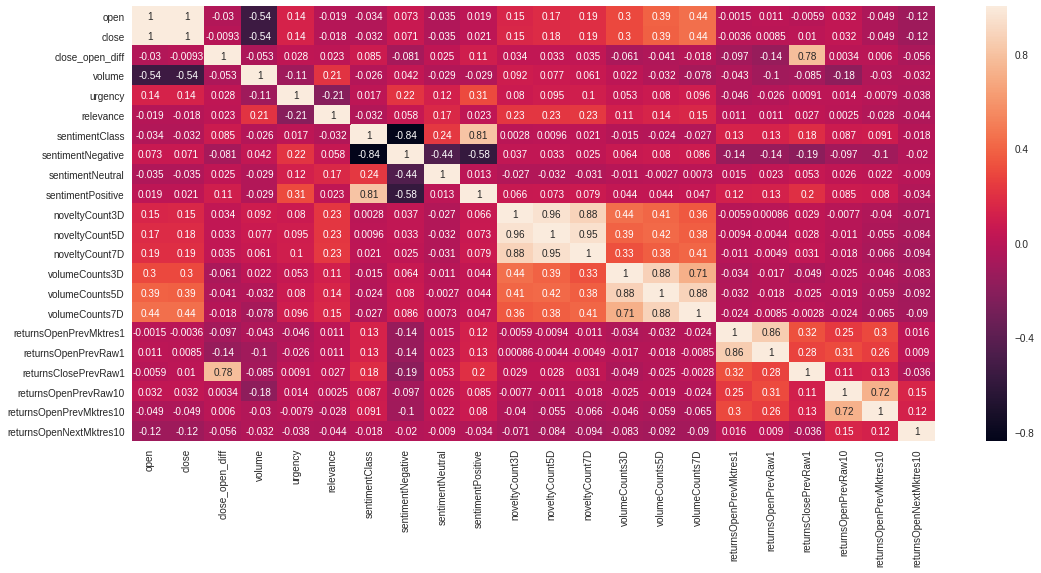

In [0]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True)

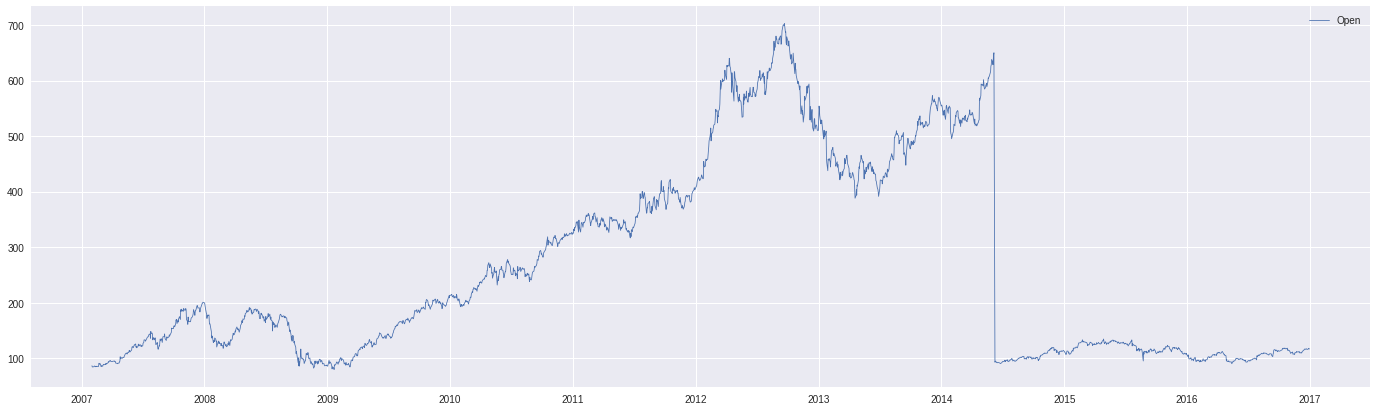

In [0]:
plt.figure(figsize=(24,7))

plt.plot(df['open'], label='Open', linewidth=0.8)  
plt.legend()  
plt.show()

In [0]:
df.Timestamp = pd.to_datetime(df.time, format = '%Y-%m-%d %H:%M')
df.index = df.Timestamp

#Daily
daily = df.resample('D').mean()

#Weekly
weekly = df.resample('W').mean()

#Monthly
monthly = df.resample('M').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


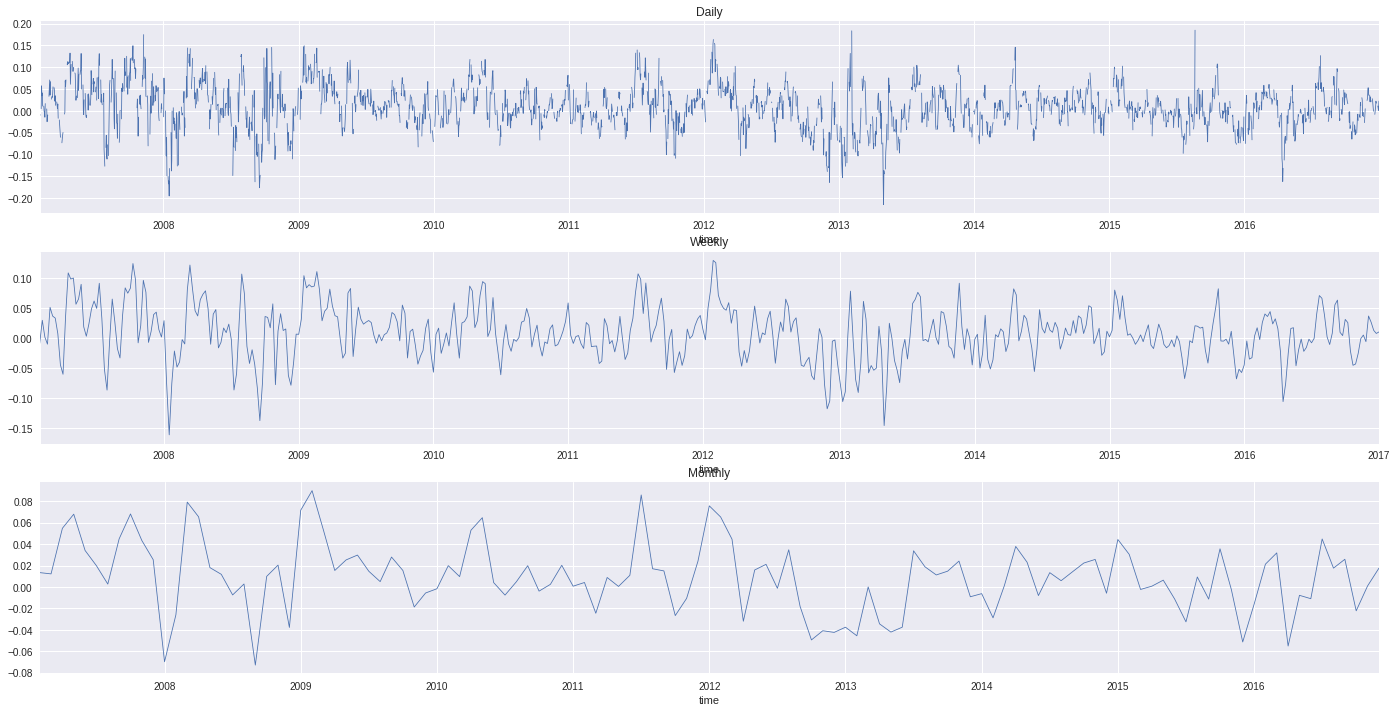

In [0]:
fig,axs = plt.subplots(3,1)

daily.returnsOpenNextMktres10.plot(figsize = (24,12), title = "Daily", ax = axs[0], linewidth=0.8)
weekly.returnsOpenNextMktres10.plot(figsize = (24,12), title = "Weekly", ax = axs[1], linewidth=0.8)
monthly.returnsOpenNextMktres10.plot(figsize = (24,12), title = "Monthly", ax = axs[2], linewidth=0.8)

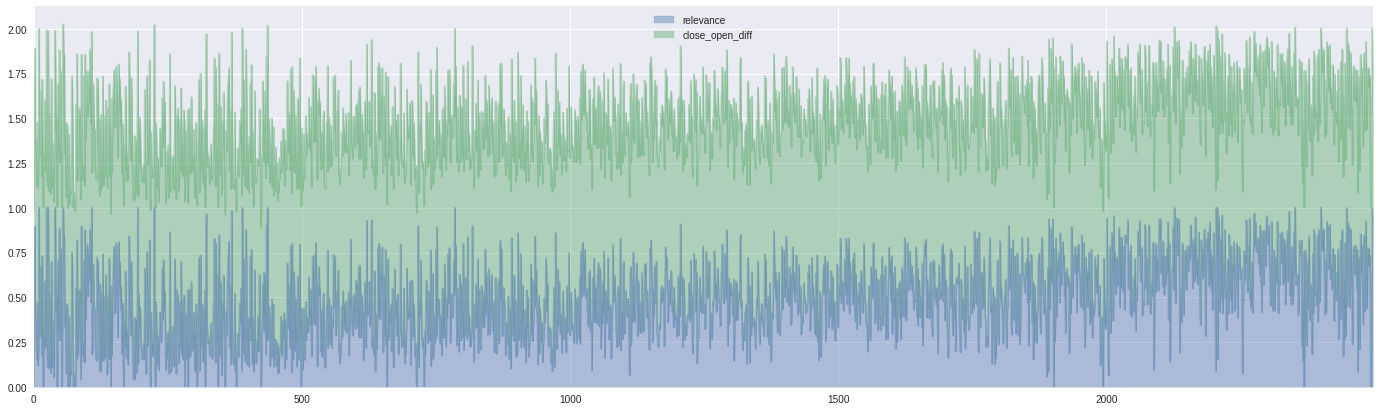

In [0]:
df[['relevance', 'close_open_diff']].plot.area(alpha=0.4, figsize=(24, 7))

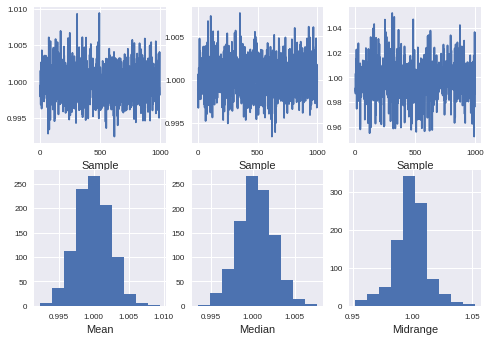

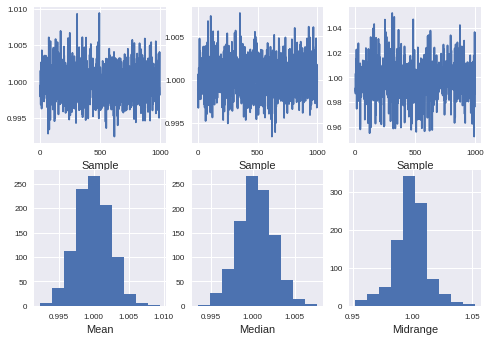

In [0]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(df['close_open_diff'], size=50, samples=1000)

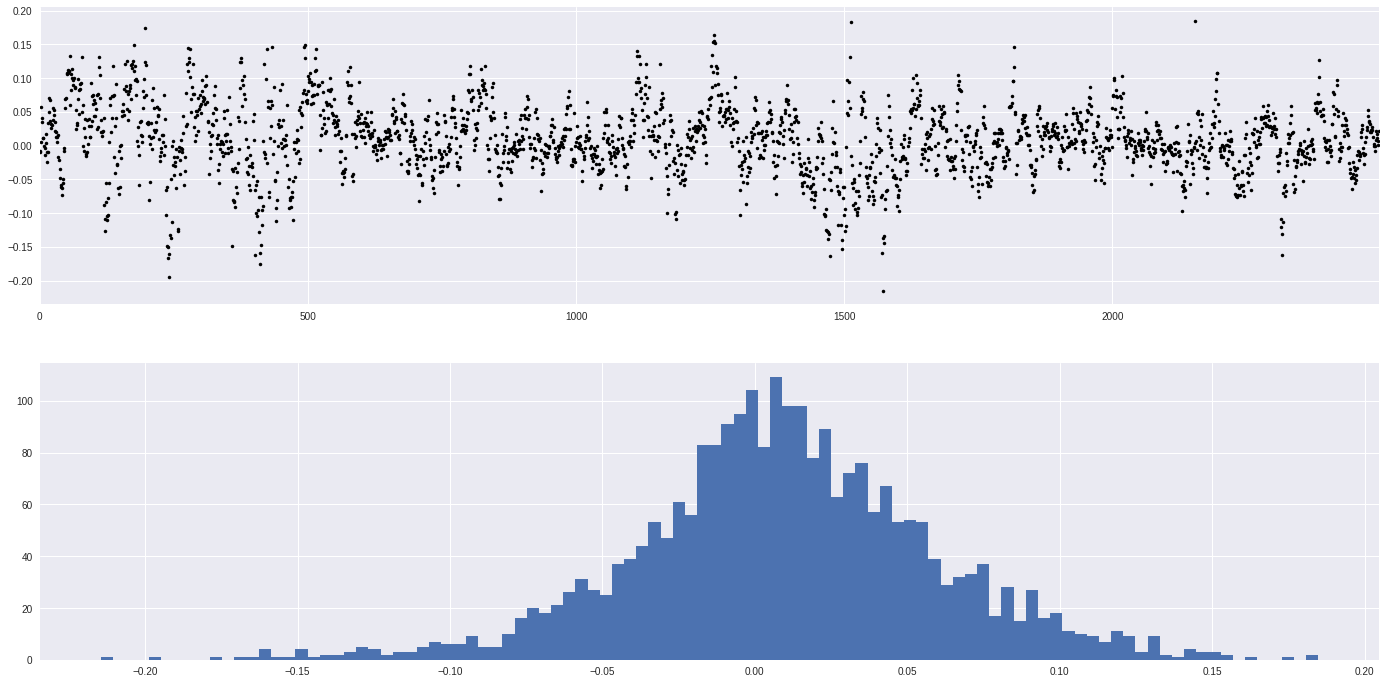

In [0]:
series = df['returnsOpenNextMktres10']

fig,axs = plt.subplots(2,1)
series.plot(figsize = (24,12), ax = axs[0], style='k.')
series.hist(figsize = (24,12), ax = axs[1], bins=100)
plt.show()

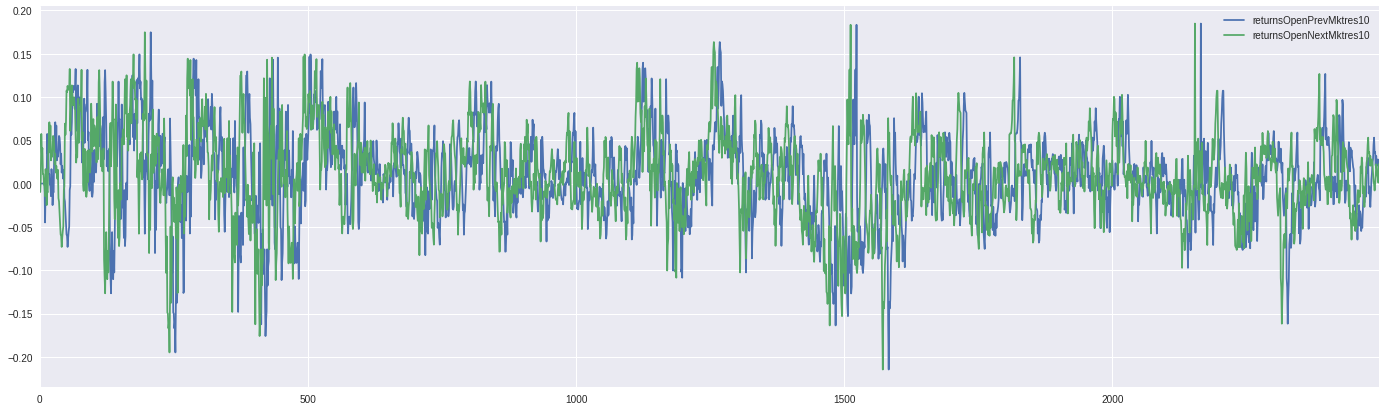

In [0]:
series = df[['returnsOpenPrevMktres10', 'returnsOpenNextMktres10']]

series.plot(figsize=(24,7))
plt.show()

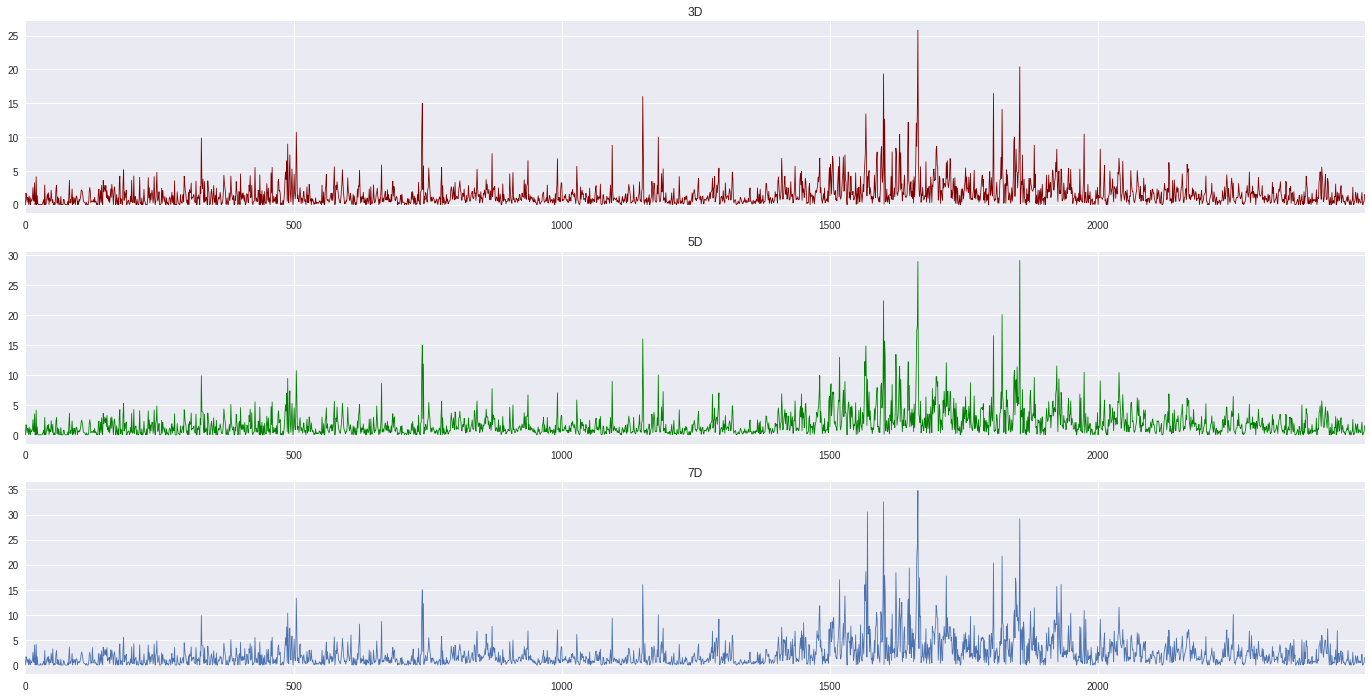

In [0]:
fig,axs = plt.subplots(3,1)

df['noveltyCount3D'].plot(figsize = (24,12), title = "3D", ax = axs[0], color='maroon', linewidth=0.8)
df['noveltyCount5D'].plot(figsize = (24,12), title = "5D", ax = axs[1], color='green', linewidth=0.8)
df['noveltyCount7D'].plot(figsize = (24,12), title = "7D", ax = axs[2], linewidth=0.8)

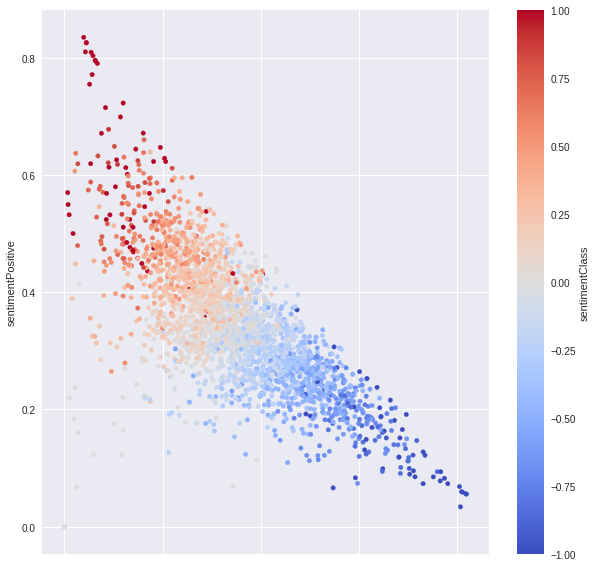

In [0]:
df.plot.scatter(x='sentimentNegative', y='sentimentPositive', c='sentimentClass', cmap='coolwarm', figsize=(10, 10))

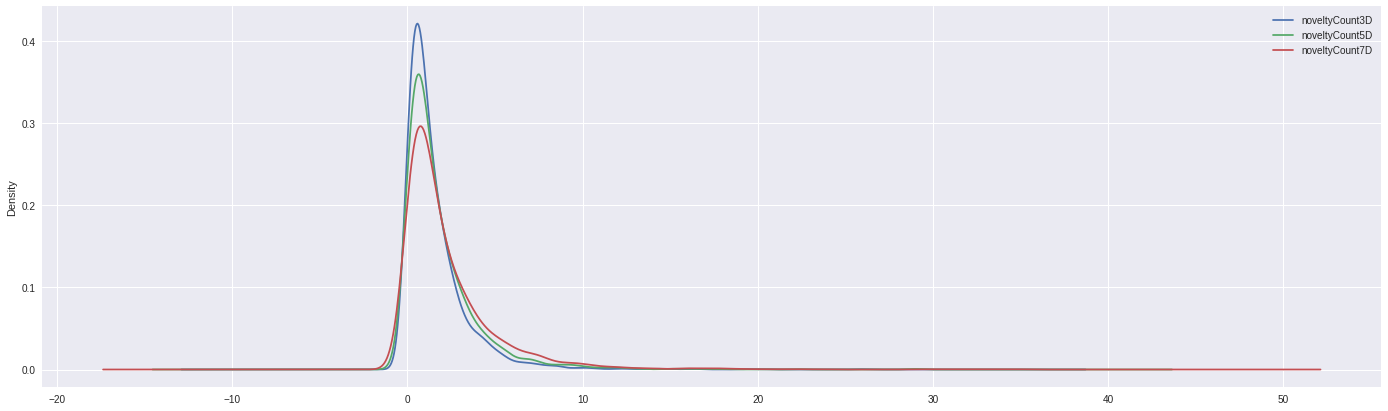

In [0]:
df[['noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D']].plot.kde(figsize=(24, 7))

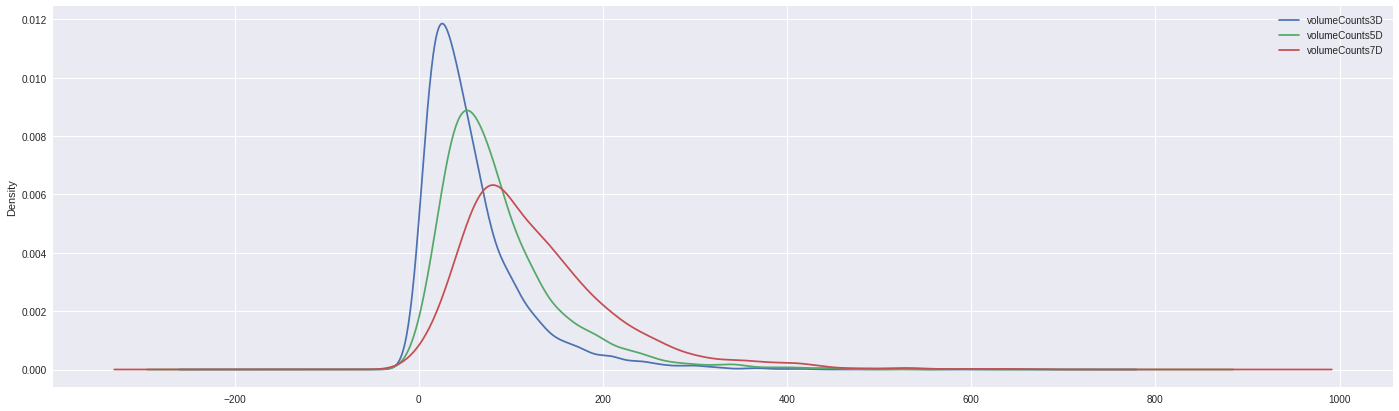

In [0]:
df[['volumeCounts3D', 'volumeCounts5D', 'volumeCounts7D']].plot.kde(figsize=(24, 7))

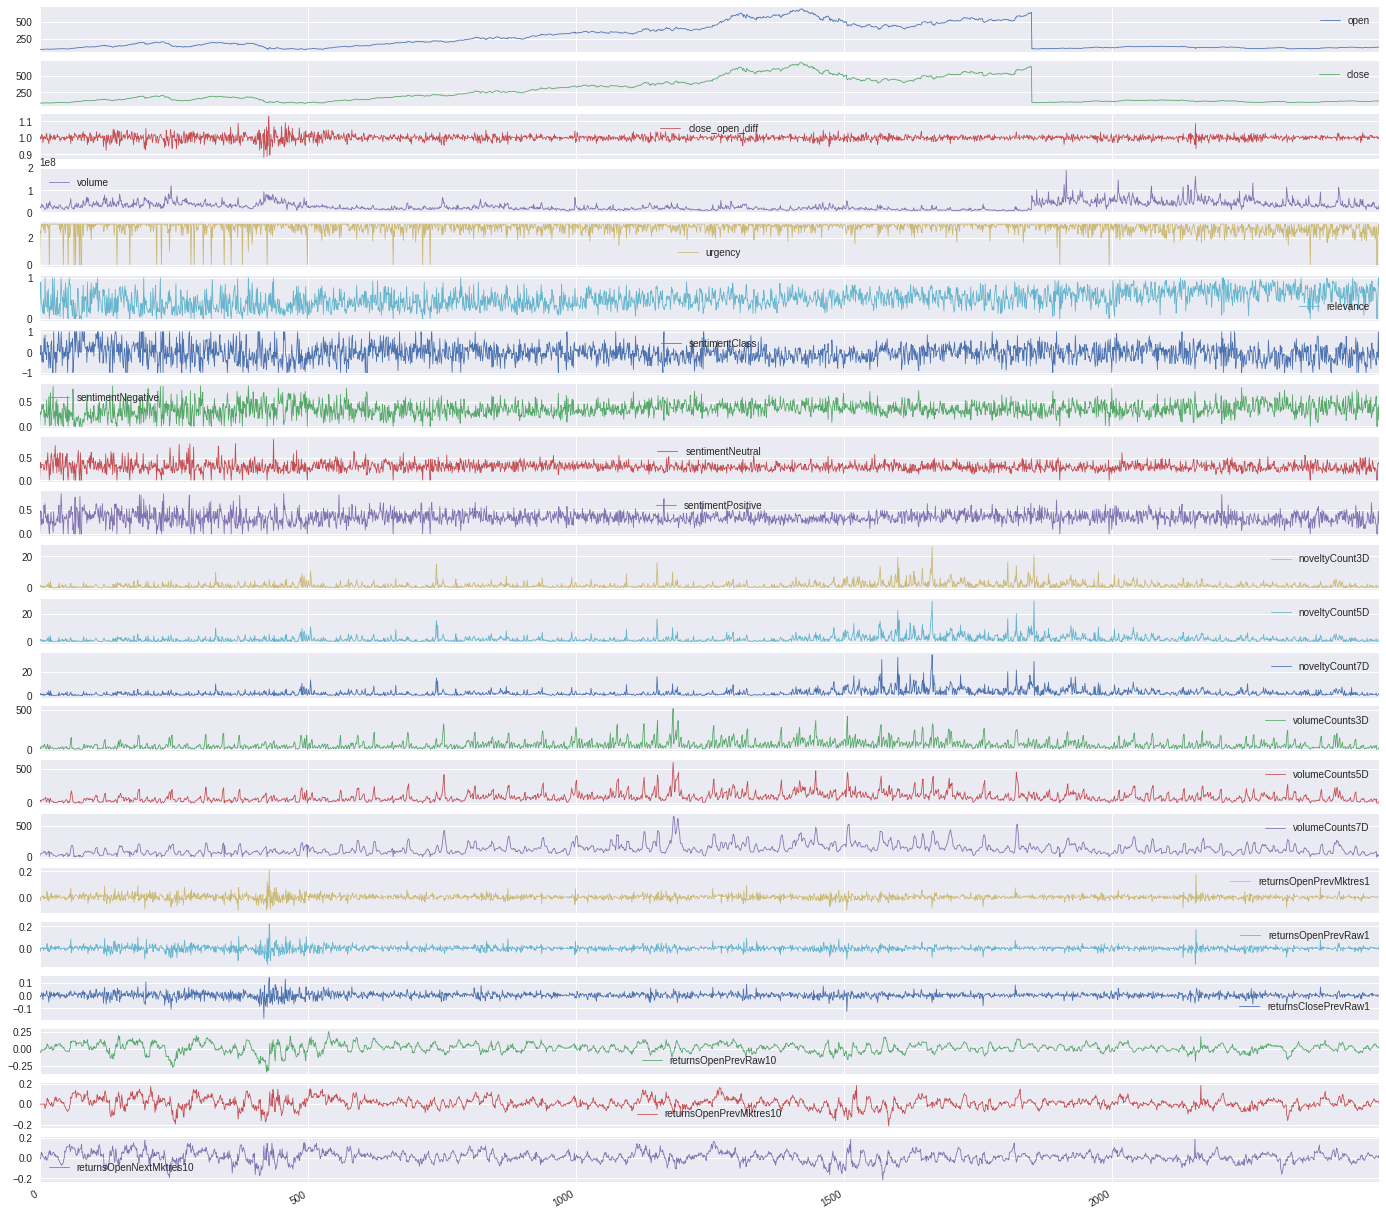

In [0]:
df.plot(subplots=True, figsize=(24, 24), linewidth=0.8);